In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd

In [0]:
link = "https://drive.google.com/open?id=1rMufXcH_HEUaZaN705XwiqjjCnGCioSx"
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
df = pd.read_csv('data.csv')

In [7]:
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [0]:
import matplotlib.pyplot as plt

In [0]:
del(df['id'])
df.drop('Unnamed: 32', axis = 1, inplace = True)


In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
df_y = df[['diagnosis']]
df_y = pd.DataFrame(df['diagnosis'].apply(lambda x: 1 if x == "M" else 0))
df_x = df.drop(columns = ['diagnosis'])



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=22)

In [13]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
31,-0.651174,-0.156630,-0.580588,-0.606186,1.067656,0.906650,0.437655,0.084780,1.814973,2.120694,0.272425,-0.331122,0.289325,0.011470,-0.498672,0.475527,0.319084,-0.231145,0.298870,0.633645,0.116870,0.398376,0.364554,0.015543,1.397231,2.055803,2.047460,0.617384,3.249514,3.019789
77,1.119669,-0.759944,1.171303,0.997289,0.745208,2.120230,1.041078,1.574919,1.260234,0.540438,2.027689,-1.177254,1.649716,1.992769,0.297389,1.815704,0.462891,1.413057,0.690702,1.123897,1.269382,-1.114336,1.278990,1.269292,0.688811,1.966193,0.518651,1.478216,1.504440,1.430987
40,-0.194918,0.524759,-0.238665,-0.259060,-1.078089,-0.851884,-0.736817,-0.751003,-0.109860,-0.983680,-0.587412,-0.690221,-0.623518,-0.420909,-1.255414,-0.802201,-0.574548,-0.801487,-0.801464,-0.914874,-0.067283,0.748221,-0.138832,-0.159666,-1.022092,-0.316024,-0.301698,-0.054560,0.196498,-0.694981
519,-0.391679,-0.629817,-0.390769,-0.455311,1.184909,0.138050,-0.637110,-0.495308,1.141095,0.470267,-0.076796,-0.378767,-0.180767,-0.250027,0.153772,-0.548534,-0.388203,-0.430020,-0.277789,-0.086712,-0.373516,-0.649518,-0.403036,-0.444380,0.675444,-0.356698,-0.620963,-0.530650,0.329538,0.067536
215,-0.075151,-0.575401,-0.040556,-0.213967,0.459401,0.908577,0.142548,0.196182,1.088972,0.881470,-0.524686,-0.041726,-0.450351,-0.375284,-0.362386,0.488791,0.225118,0.395447,-0.112677,0.242362,-0.104528,0.202922,-0.082239,-0.225369,0.608612,1.162873,0.928584,0.784596,1.295377,1.166187


In [0]:
import numpy as np


In [0]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [16]:
X_train.shape

(455, 30)

In [0]:
X_train = X_train.reshape(X_train.shape[0],3,10,1)
X_test = X_test.reshape(X_test.shape[0],3,10,1)

In [18]:
X_train

array([[[[-0.65117427],
         [-0.15663014],
         [-0.58058795],
         ...,
         [ 0.08477969],
         [ 1.81497293],
         [ 2.12069352]],

        [[ 0.27242453],
         [-0.33112228],
         [ 0.28932539],
         ...,
         [-0.23114487],
         [ 0.2988696 ],
         [ 0.63364456]],

        [[ 0.11687011],
         [ 0.39837566],
         [ 0.36455405],
         ...,
         [ 0.61738396],
         [ 3.24951435],
         [ 3.0197887 ]]],


       [[[ 1.11966883],
         [-0.75994372],
         [ 1.17130312],
         ...,
         [ 1.57491871],
         [ 1.26023399],
         [ 0.54043842]],

        [[ 2.02768879],
         [-1.17725375],
         [ 1.6497158 ],
         ...,
         [ 1.41305714],
         [ 0.6907016 ],
         [ 1.12389683]],

        [[ 1.26938186],
         [-1.1143357 ],
         [ 1.27898979],
         ...,
         [ 1.47821576],
         [ 1.50443988],
         [ 1.43098695]]],


       [[[-0.1949184 ],
         [ 0

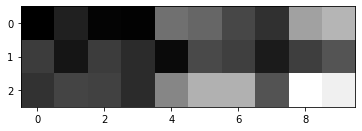

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(3,10), cmap="gray")

In [20]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=2, activation='relu', input_shape=(3,10,1)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [22]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 455 samples, validate on 114 samples
Epoch 1/10





455/455 [==============================] - 1s 2ms/step - loss: 0.6039 - acc: 0.7495 - val_loss: 0.4795 - val_acc: 0.9211
Epoch 2/10
455/455 [==============================] - 0s 66us/step - loss: 0.3995 - acc: 0.9319 - val_loss: 0.3104 - val_acc: 0.9474
Epoch 3/10
455/455 [==============================] - 0s 64us/step - loss: 0.2794 - acc: 0.9451 - val_loss: 0.2201 - val_acc: 0.9474
Epoch 4/10
455/455 [==============================] - 0s 62us/step - loss: 0.2134 - acc: 0.9429 - val_loss: 0.1717 - val_acc: 0.9649
Epoch 5/10
455/455 [==============================] - 0s 60us/step - loss: 0.1758 - acc: 0.9473 - val_loss: 0.1495 - val_acc: 0.9649
Epoch 6/10
455/455 [==============================] - 0s 57us/step - loss: 0.1502 - acc: 0.9560 - val_loss: 0.1332 - val_acc: 0.9737
Epoch 7/10
455/455 [==============================] - 0

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = (y_pred > 0.5)

In [26]:
# Making report
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114
 samples avg       0.96      0.96      0.96       114



In [0]:
def convert_test(y):
  if y[0] == True:
    return 'B'
  else:
    return 'M'

y_pred = [convert_test(y) for y in y_pred]

In [0]:
y_test = [convert_test(y) for y in y_test.astype(bool)]

Accuracy is:  0.9649122807017544


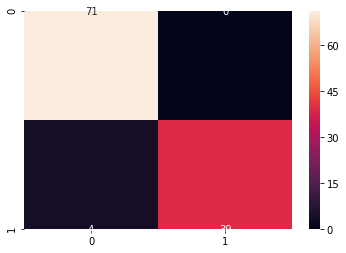

In [43]:
import seaborn as sns
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot=True,fmt="d")